Heart Disease in Cleveland
=====
A Classification Analysis 
----

Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Relivent Papers: 

http://rexa.info/paper/b884ce2f4aff7ed95ce7bfa7adabaef46b88c60c

http://rexa.info/paper/0519d1408b992b21964af4bfe97675987c0caefc

http://rexa.info/paper/faecfadbd4a49f6705e0d3904d6770171b05041f

Introduction
----
ksdgfjawfh


In [13]:
library(tidyverse)
library(tidymodels)
library(repr) 
library(gridExtra)
library(readxl)
set.seed(420)

Step 1: Read in the Data
----

In [2]:
Cl_heart_data <- read.table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", sep = ",",
                 col.names = c("age", "sex", "cp", "trestbps", "chol", "fbs",  "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
head(Cl_heart_data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


Step 2: Clean and Wrangle data into tidy format 
-----
(choose parameters that we will use in our model) 

**Class that we are predicting:**
diagnosis (num)

**Parameters that we will use in training our model:**

Sex: 

Age: 

Resting blood pressure (trestbps): 

Cholesterol Level (chol): 

Fasting blood pressure (fbs): This is defined as a risk facotr for heart disease

ST depression (oldpeak):this is a risk factor

Number of major vessles coloured by flouroscopy (ca): Having blocked off vessles is a menas of diagnosis for heart disease so is a very strong indicator. 

**Parameters that we will not use in training our model** 

Chest pain type (cp): This can be caused by multiple different extranous variables (such as other conditions that are not related to heart disease). 

Resting ECG data (Restecg): Tells you if you have had a heart attack in the past or if you are at risk for one in the future. 

Excersize enduced heart pain (exang): we dont want to many binary predictors

Maximum heart rate achieved (thalch): more an indicator of fitness? (cite later) 

Slope of peak excersize ST segment (slope): 

(thal): not enough info on what it is so not useful

In [3]:
#select for columns 
cut_heart_data <- Cl_heart_data |>
    select("age", "sex", "trestbps", "chol", "fbs", "oldpeak", "ca", "num")
head(cut_heart_data)

#mutate columns to factor data type
clean_heart_data <- cut_heart_data |>
    mutate(ca = as.numeric(ca))
head(clean_heart_data)

,age,sex,trestbps,chol,fbs,oldpeak,ca,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,63,1,145,233,1,2.3,0.0,0
2,67,1,160,286,0,1.5,3.0,2
3,67,1,120,229,0,2.6,2.0,1
4,37,1,130,250,0,3.5,0.0,0
5,41,0,130,204,0,1.4,0.0,0
6,56,1,120,236,0,0.8,0.0,0


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


,age,sex,trestbps,chol,fbs,oldpeak,ca,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,63,1,145,233,1,2.3,0,0
2,67,1,160,286,0,1.5,3,2
3,67,1,120,229,0,2.6,2,1
4,37,1,130,250,0,3.5,0,0
5,41,0,130,204,0,1.4,0,0
6,56,1,120,236,0,0.8,0,0


In [4]:
#splitting data into training and testing sets
heart_data_split <-  initial_split(clean_heart_data, prop = 0.75, strata = num)
heart_train <- training(heart_data_split) |>
    select(-num)
heart_test <- testing(heart_data_split)
head(heart_train)
head(heart_test)

,age,sex,trestbps,chol,fbs,oldpeak,ca
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,1,145,233,1,2.3,0
4,37,1,130,250,0,3.5,0
5,41,0,130,204,0,1.4,0
8,57,0,120,354,0,0.6,0
12,56,0,140,294,0,1.3,0
14,44,1,120,263,0,0.0,0


,age,sex,trestbps,chol,fbs,oldpeak,ca,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
6,56,1,120,236,0,0.8,0,0
7,62,0,140,268,0,3.6,2,3
10,53,1,140,203,1,3.1,0,1
11,57,1,140,192,0,0.4,0,0
15,52,1,172,199,1,0.5,0,0
19,48,0,130,275,0,0.2,0,0


Step 3: Visualizing the Data
-----
Note: this is only with the training data

In [5]:
names <- c("Mean", "Median") #"Number_of_Rows"
mean <- heart_train |>
    map_df(mean, na.rm = TRUE)
median <- heart_train |>
    map_df(median, na.rm = TRUE)
# count <- heart_train |>   #how do we count the number of individual data poinsts not just rows?
#     map_df()
tbl1 <- bind_rows(mean, median)# , count)
exploratory_analysis <- bind_cols(names, tbl1)
exploratory_analysis

New names:
• `` -> `...1`


...1,age,sex,trestbps,chol,fbs,oldpeak,ca
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,54.77434,0.6902655,132.6195,245.3053,0.1548673,1.023451,0.6547085
Median,56.00000,1.0000000,130.0000,240.0000,0.0000000,0.800000,0.0000000


Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”


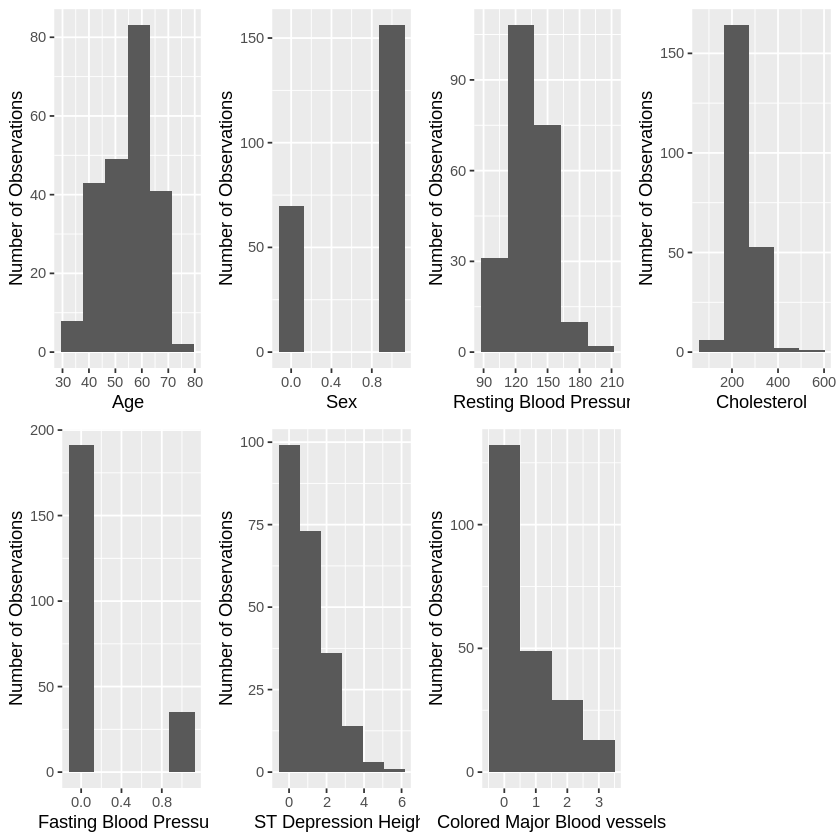

In [12]:
age_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 6, aes(x=age)) +
    labs(x="Age",y = "Number of Observations")

sex_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5, aes(x=sex)) +
    labs(x="Sex",y = "Number of Observations") 

trestbps_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=trestbps)) +
    labs(x="Resting Blood Pressure",y = "Number of Observations") 

chol_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5,aes(x=chol)) +
    labs(x="Cholesterol",y = "Number of Observations") 

fbs_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 5 ,aes(x=fbs)) +
    labs(x="Fasting Blood Pressure",y = "Number of Observations") 

oldpeak_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 6,aes(x=oldpeak)) +
    labs(x="ST Depression Height",y = "Number of Observations") 

ca_distribution <- heart_train |>
    ggplot() +
    geom_histogram(bins = 4,aes(x=ca)) +
    labs(x="Colored Major Blood vessels",y = "Number of Observations") 

grid.arrange(age_distribution,sex_distribution,trestbps_distribution, chol_distribution, fbs_distribution, oldpeak_distribution, ca_distribution, ncol =4)